# Instructions

Marketing campaign analysis on which customers we should target for wine purchases.  
We have data from 3rd party on 2240 customers and some of their past behaviors.  
We need to determine which customers are most likely to buy wines.  

## Exercise  
Please review and analyze data  
Create visualizations as needed  
Run any other further advanced analysis if you prefer   
Run a ML model with your validations if you judge necessary  
You can create new variables and transformations (Please, document these steps)  
Draw conclusions  
Present analysis to management - you can use power point, excel or python  

## Data Definitions

Content
Attributes
- People
    - id: customer's unique identifier  
    - year_birth: customer's birth year  
    - education: customer's education level  
    - marital_status: customer's marital status  
    - income: customer's yearly household income  
    - kidhome: number of children in customer's household  
    - teenhome: number of teenagers in customer's household  
    - dt_customer: date of customer's enrollment with the company  
    - recency: number of days since customer's last purchase  
    - complain: 1 if customer complained in the last 2 years, 0 otherwise  
- Products
    - mnt_wines: amount spent on wine in last 2 years  
    - mnt_fruits: amount spent on fruits in last 2 years  
    - mnt_meat_products: amount spent on meat in last 2 years  
    - mnt_fish_products: amount spent on fish in last 2 years  
    - mnt_sweet_products: amount spent on sweets in last 2 years  
    - mnt_gold_prods: amount spent on gold in last 2 years  
- Promotion
    - num_deals_purchases: _number of purchases made with a discount  
    - accepted_cmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
    - accepted_cmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
    - accepted_cmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
    - accepted_cmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
    - accepted_cmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
    - response: 1 if customer accepted the offer in the last campaign, 0 otherwise  
- Place
    - num_web_purchases: number of purchases made through the company’s web site  
    - num_catalog_purchases: number of purchases made using a catalogue  
    - num_store_purchases: number of purchases made directly in stores  
    - num_web_visits_month: number of visits to company’s web site in the last month  



In [50]:
import os
import sys

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
%matplotlib inline
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.set_palette("Blues_r")

# turn off warnings for final notebook
warnings.filterwarnings("ignore")

sns.color_palette(palette='pastel', as_cmap=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette='pastel', rc=custom_params)

# load data
df = pd.read_excel("../data/marketing_campaign_wines.xlsx", sheet_name="data")

# First Look at the Data

As the first action we are going to inspect the data, by looking at its head, the describe and the data types.  
By doing this we can have the first round of data cleaning.
- Clean up the column names to a pythonic format
- Make all string values lowercase (standardize it)
- Convert dates to datetime
- Check for missing values
- Check the unique values for categorical variables
    - There are any weird values?
- Check for duplicates
- Check for outliers


## Look at the data

In [51]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [52]:
df["ID"].nunique(), df.shape[0]

(2240, 2240)

In [53]:
desc = df.describe()

desc.loc[["mean", "50%", "std"]]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


## Convert column names from camelCase to snake_case

In [54]:
def camel_to_snake(name: str) -> str:
    """
    Convert a string from camelCase to snake_case
    :name: str
    :returns: str
    """
    name = re.sub("(.)([A-Z][a-z]+)", r"\1_\2", name)
    name = re.sub("([a-z0-9])([A-Z])", r"\1_\2", name).lower()
    # replace double underscores with single
    name = name.replace("__", "_")
    return name


df.columns = [camel_to_snake(col) for col in df.columns]

df.columns = df.columns.str.replace("__", "_")

## Convert date columns to datetime

In [55]:
# convert Dt_Customer to datetime
df.dt_customer = pd.to_datetime(df.dt_customer)

# make all string columns values lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

## Profile the missing and inconsistent values

In [56]:
# profile the missing and inconsistent values
missing = df.isna().sum()
infinity = df.eq(np.inf).sum()

print("Missing values:")
print(missing[missing > 0])

print("\nInfinite values:")
print(infinity[infinity > 0])

Missing values:
income    24
dtype: int64

Infinite values:
Series([], dtype: int64)


In [57]:
# Create a missing income flag column
df["income_missing"] = df.income.isna().astype(int)

# get the kendall correlations with income_missing
df.select_dtypes(include=np.number).corr(method="kendall")["income_missing"]

id                       0.009096
year_birth              -0.010282
income                        NaN
kidhome                  0.037951
teenhome                 0.013498
recency                  0.026351
mnt_wines               -0.022538
mnt_fruits              -0.022415
mnt_meat_products       -0.017212
mnt_fish_products       -0.018537
mnt_sweet_products      -0.011328
mnt_gold_prods          -0.010883
num_deals_purchases     -0.008876
num_web_purchases       -0.025738
num_catalog_purchases   -0.031121
num_store_purchases     -0.029120
num_web_visits_month    -0.005253
accepted_cmp3           -0.029154
accepted_cmp4            0.019987
accepted_cmp5           -0.012460
accepted_cmp1            0.008082
accepted_cmp2           -0.012125
complain                -0.010124
z_cost_contact                NaN
z_revenue                     NaN
response                -0.031391
income_missing           1.000000
Name: income_missing, dtype: float64

In [58]:
print(df.groupby("marital_status")["income_missing"].mean())
print(df.groupby("education")["income_missing"].mean())


marital_status
absurd      0.000000
alone       0.000000
divorced    0.000000
married     0.008102
single      0.018750
together    0.012069
widow       0.012987
yolo        0.000000
Name: income_missing, dtype: float64
education
2n cycle      0.014778
basic         0.000000
graduation    0.009760
master        0.013514
phd           0.010288
Name: income_missing, dtype: float64


**Missing values insights**
- On the missing values we noticed that Income has 24 missing values.  
- We can see that missing values are not correlated with any other feature.
    - This indicates that the missing income cannot be attributed to any other condition.  
- Can we create a model to predict the missing values?  
- We gonna use later the KNN imputer to fill the missing values.  

## Categorical variables analysis

In [59]:
# select the object columns and get the missing values mean
string_columns = df.select_dtypes(include="object").columns.to_list()

# get the values counts for each string column
for col in string_columns:
    print(f"{col}: \n {df[col].value_counts()}")
    print("\n")

education: 
 education
graduation    1127
phd            486
master         370
2n cycle       203
basic           54
Name: count, dtype: int64


marital_status: 
 marital_status
married     864
together    580
single      480
divorced    232
widow        77
alone         3
absurd        2
yolo          2
Name: count, dtype: int64




- What are those values n the `marital_status` column?
 - `alone`
 - `absurd`
 - `yolo`

In [60]:
# get the lines the marital status for alone, absurd and yolo

df[df.marital_status.isin(["absurd", "yolo", "alone"])]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,income_missing
131,433,1958,master,alone,61331.0,1,1,2013-10-03,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,3,11,0,0
138,7660,1973,phd,alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1,0
153,92,1988,graduation,alone,34176.0,1,0,2014-12-05,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0,0
2093,7734,1993,graduation,absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1,0
2134,4369,1957,master,absurd,65487.0,0,0,2014-10-01,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0,0
2177,492,1973,phd,yolo,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0,0
2202,11133,1973,phd,yolo,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1,0


- Looking at those weird values we can see that those values are too weird to be considered to get insights.  
- One thing that we can notice is that there is duplicates in the data for different `id` and `target`.  

In [61]:
df['marital_status'].unique()

array(['single', 'together', 'married', 'divorced', 'widow', 'alone',
       'absurd', 'yolo'], dtype=object)

In [62]:
df['marital_status'] = df['marital_status'].replace(['absurd', 'yolo', 'alone'], 'single')

In [63]:
df.groupby("marital_status")['response'].mean()

marital_status
divorced    0.206897
married     0.113426
single      0.223819
together    0.103448
widow       0.246753
Name: response, dtype: float64

## Check for duplicates

In [64]:
df[df.duplicated(keep=False)]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,income_missing


In [65]:
def deduplicated_rows(df: pd.DataFrame, return_inconsistent: bool = False) -> pd.DataFrame | tuple[pd.DataFrame, pd.DataFrame]:
    """
    Remove duplicated rows from a dataframe

    :df: pd.DataFrame
    :return_inconsistent: bool whether to return the inconsistent rows
    """
    # get the columns 
    columns = df.drop(columns=["id", "response", "income_missing"]).columns.to_list()
    # get the duplicated rows
    df_dup = df[df[columns].duplicated(keep=False)]
    # get the non-duplicated rows
    df_non_dup = df[~df.index.isin(df_dup.index)]

    # sort the duplicated rows
    df_dup = df_dup.sort_values(by=columns)
    # get the target sum and count to check for inconsistency on the duplicated rows
    df_dup["target_sum"] = df_dup.groupby(columns)["response"].transform("sum")
    df_dup["target_count"] = df_dup.groupby(columns)["response"].transform("count")

    # check for inconsistency
    mask = (df_dup["target_sum"] == df_dup["target_count"])
    mask |= (df_dup["target_sum"] == 0)
    # filter the inconsistent duplicated rows and dedup
    df_dedup = df_dup[mask].drop_duplicates(subset=columns, keep="first")
    if return_inconsistent:
        df_inconsistent = df_dup[~mask] 
        return pd.concat([df_non_dup, df_dedup], ignore_index=True),  df_inconsistent

    return pd.concat([df_non_dup, df_dedup], ignore_index=True)


In [66]:
df, df_inconsistent = deduplicated_rows(df=df, return_inconsistent=True)

In [67]:
# drop auxiliary columns
df = df.drop(columns=["income_missing", "target_sum", "target_count"])

In [68]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response
0,5524,1957,graduation,single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,graduation,single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,graduation,together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,graduation,together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,phd,married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2253,1990,graduation,married,18929.0,0,0,2013-02-16,15,32,0,8,23,4,18,1,1,0,4,6,0,0,0,0,0,0,3,11,0
2014,3428,1991,phd,together,68682.0,0,0,2013-06-10,56,919,0,505,99,30,45,1,4,9,10,2,0,0,0,0,0,0,3,11,0
2015,3386,1992,graduation,married,34935.0,0,0,2013-06-21,71,34,4,66,3,10,20,1,2,1,4,7,0,0,0,0,0,0,3,11,0
2016,2669,1993,graduation,single,74293.0,0,0,2014-04-05,66,375,152,335,93,91,81,1,5,4,6,2,0,0,0,0,0,0,3,11,0


In [69]:
df_inconsistent

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,income_missing,target_sum,target_count
1060,4491,1949,master,married,62845.0,1,1,2012-01-10,3,1099,0,45,0,0,34,11,3,4,10,8,0,1,0,0,0,0,3,11,0,0,1,2
1342,873,1949,master,married,62845.0,1,1,2012-01-10,3,1099,0,45,0,0,34,11,3,4,10,8,0,1,0,0,0,0,3,11,1,0,1,2
1256,9094,1955,2n cycle,married,62972.0,0,1,2012-03-08,39,313,15,47,20,0,192,2,7,4,3,6,0,0,0,0,0,0,3,11,1,0,1,2
1838,9847,1955,2n cycle,married,62972.0,0,1,2012-03-08,39,313,15,47,20,0,192,2,7,4,3,6,0,0,0,0,0,0,3,11,0,0,1,2
852,4856,1957,2n cycle,married,82347.0,0,0,2012-06-11,38,556,54,845,202,133,63,1,7,7,10,3,1,0,0,1,0,0,3,11,0,0,1,2
2193,8722,1957,2n cycle,married,82347.0,0,0,2012-06-11,38,556,54,845,202,133,63,1,7,7,10,3,1,0,0,1,0,0,3,11,1,0,1,2
690,7230,1960,phd,divorced,50611.0,0,1,2012-04-10,98,459,0,24,6,0,4,6,4,5,7,6,0,1,0,0,0,0,3,11,1,0,1,2
1373,5675,1960,phd,divorced,50611.0,0,1,2012-04-10,98,459,0,24,6,0,4,6,4,5,7,6,0,1,0,0,0,0,3,11,0,0,1,2
256,309,1961,phd,together,63342.0,0,1,2012-10-16,48,918,21,118,13,10,21,3,8,3,5,6,0,1,0,0,0,0,3,11,0,0,1,2
1750,3571,1961,phd,together,63342.0,0,1,2012-10-16,48,918,21,118,13,10,21,3,8,3,5,6,0,1,0,0,0,0,3,11,1,0,1,2


# Exploratory data analysis

Attributes
- People
    - id: customer's unique identifier  
    - year_birth: customer's birth year  
    - education: customer's education level  
    - marital_status: customer's marital status  
    - income: customer's yearly household income  
    - kidhome: number of children in customer's household  
    - teenhome: number of teenagers in customer's household  
    - dt_customer: date of customer's enrollment with the company  
    - recency: number of days since customer's last purchase  
    - complain: 1 if customer complained in the last 2 years, 0 otherwise  
- Products
    - mnt_wines: amount spent on wine in last 2 years  
    - mnt_fruits: amount spent on fruits in last 2 years  
    - mnt_meat_products: amount spent on meat in last 2 years  
    - mnt_fish_products: amount spent on fish in last 2 years  
    - mnt_sweet_products: amount spent on sweets in last 2 years  
    - mnt_gold_prods: amount spent on gold in last 2 years  
- Promotion
    - num_deals_purchases: _number of purchases made with a discount  
    - accepted_cmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
    - accepted_cmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
    - accepted_cmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
    - accepted_cmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
    - accepted_cmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
    - response: 1 if customer accepted the offer in the last campaign, 0 otherwise  
- Place
    - num_web_purchases: number of purchases made through the company’s web site  
    - num_catalog_purchases: number of purchases made using a catalogue  
    - num_store_purchases: number of purchases made directly in stores  
    - num_web_visits_month: number of visits to company’s web site in the last month  

## Check for outliers

In [70]:
numerical_features = df.drop(columns=[
    "id", 
    "response", 
    "id", 
    "dt_customer", 
    "z_cost_contact", 
    "z_revenue", 
    "education", 
    "marital_status",
    ]).select_dtypes(include="number").columns.to_list()

# remove the binaries from the numerical features
def check_num_binary(df: pd.DataFrame, numerical_features: list[str]) -> list[str]:
    return [col for col in numerical_features if df[col].nunique() == 2]


numerical_features = [col for col in numerical_features if col not in check_num_binary(df, numerical_features)]

# len(numerical_features) == 16

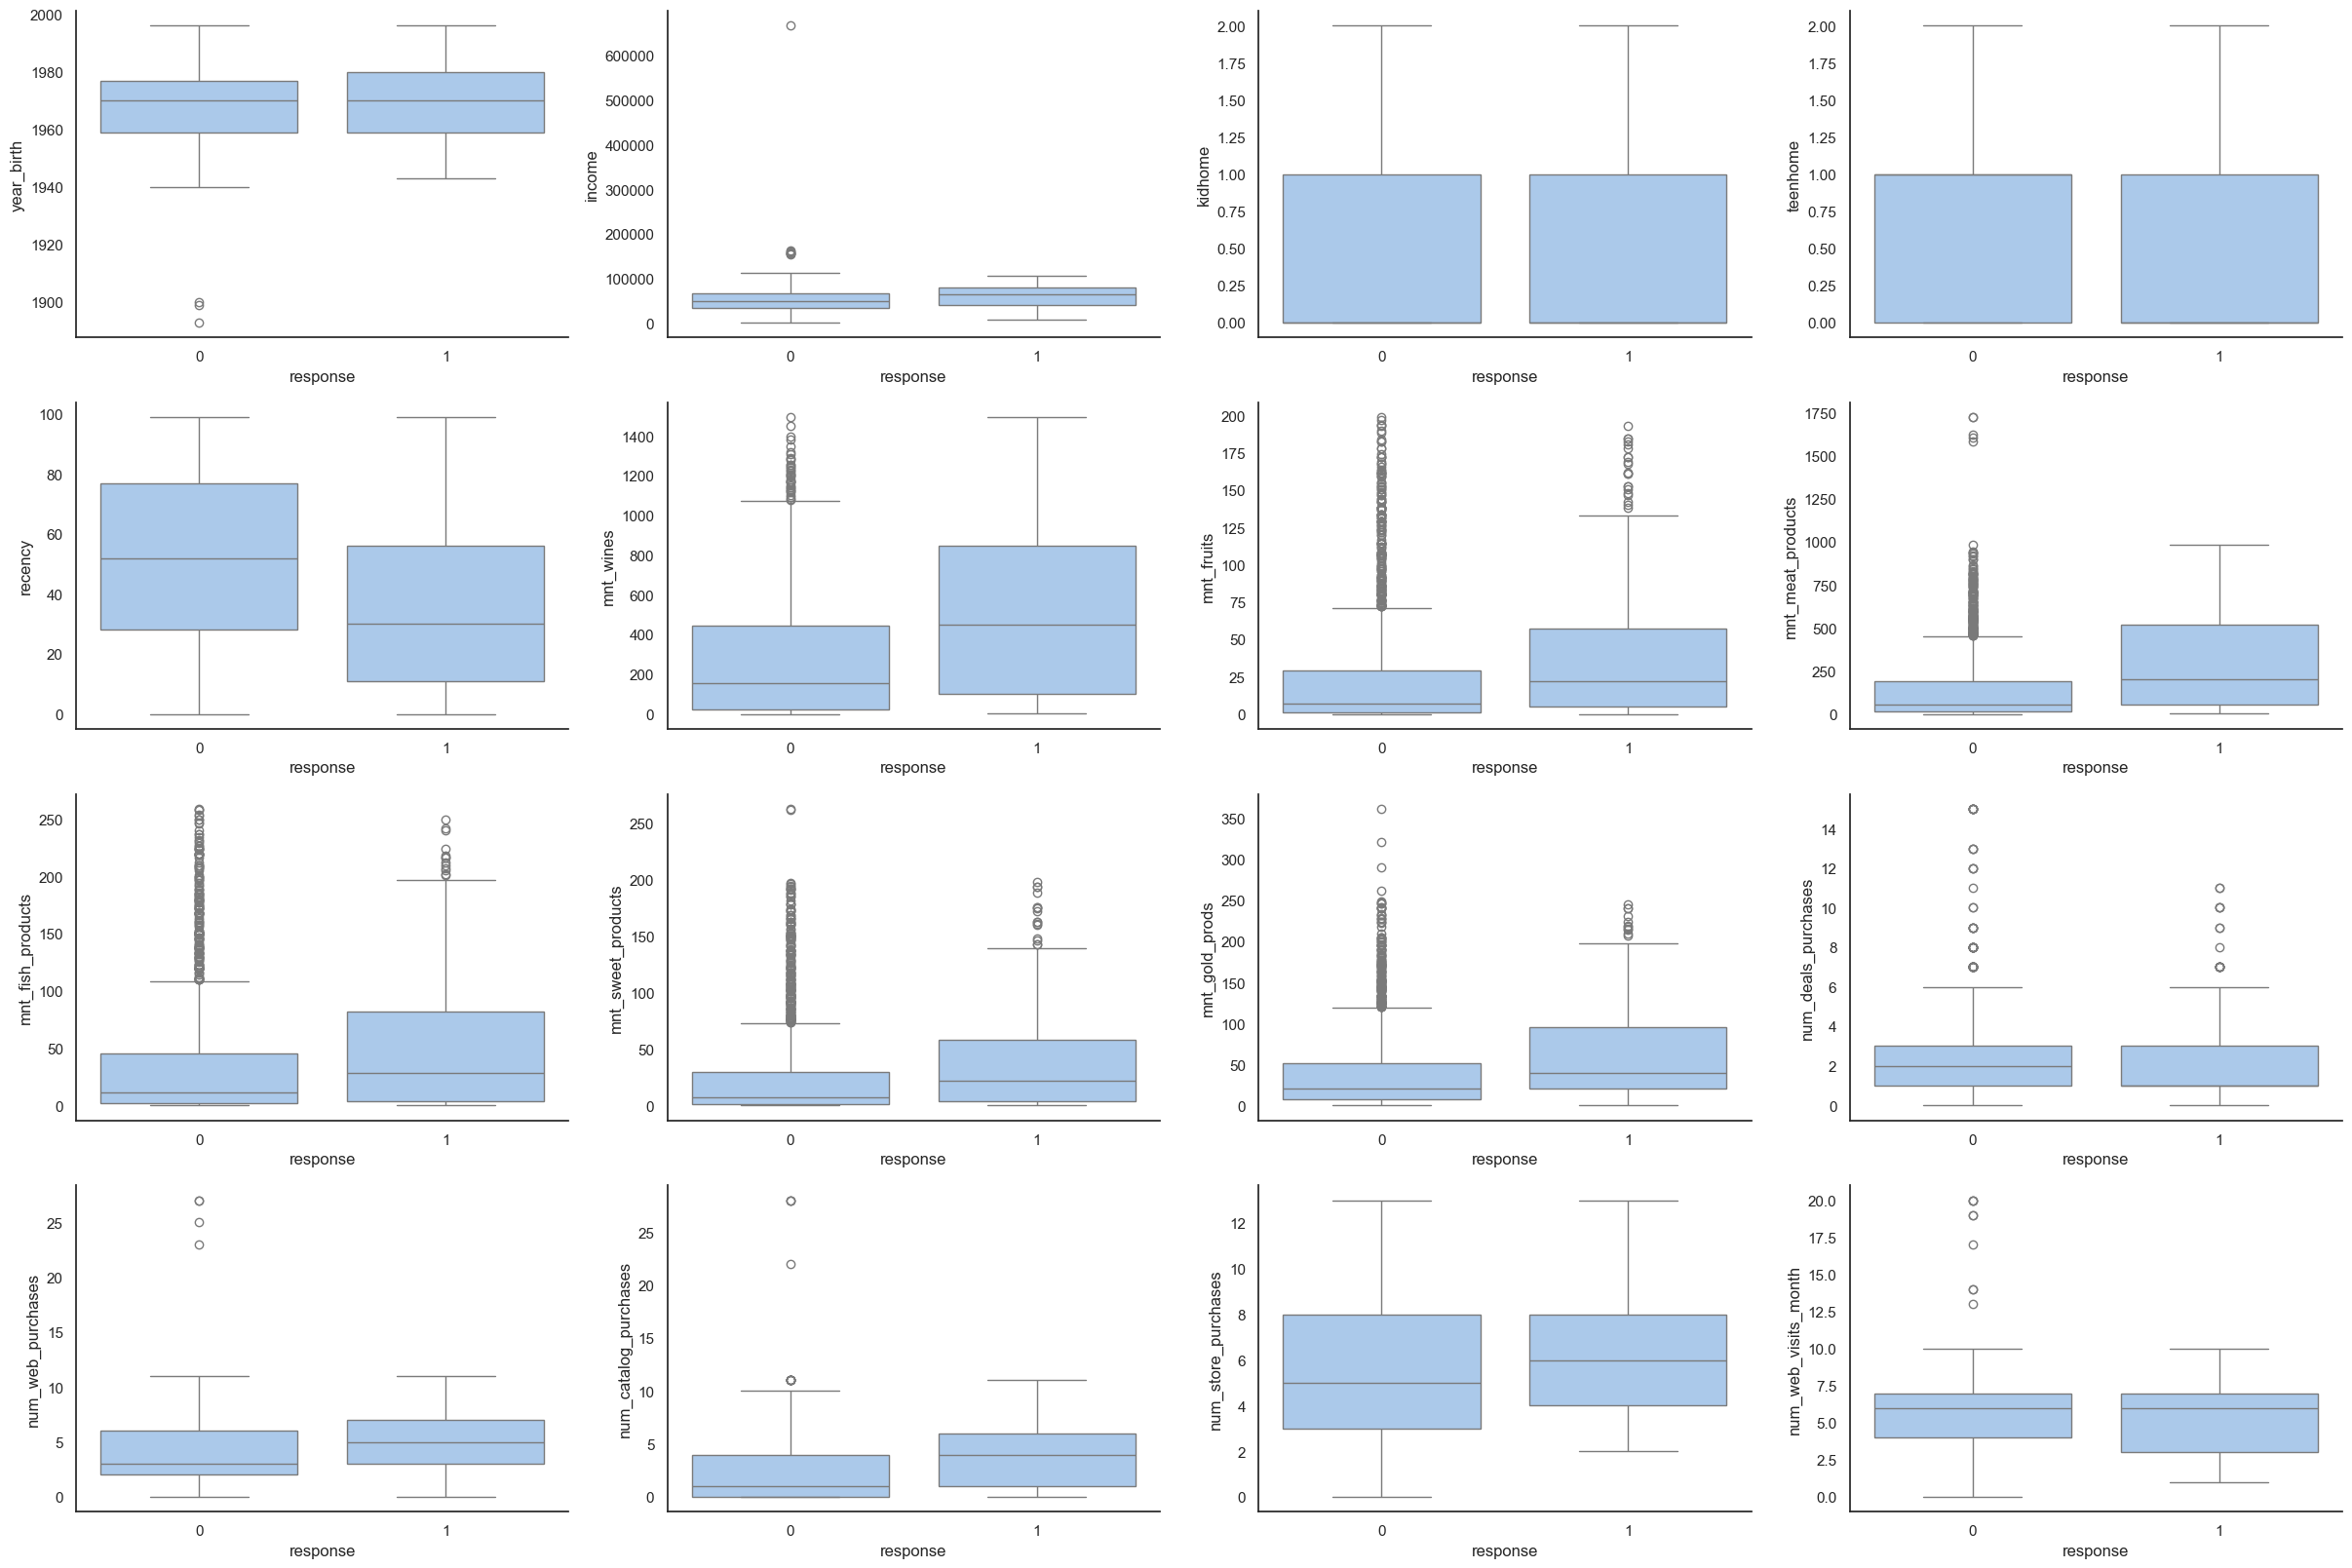

In [71]:
# create a 4 by 4 boxplot grid for the numerical features, use the response as a hue

fix, axes = plt.subplots(4, 4, figsize=(30, 20))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x="response", y=col, data=df, ax=axes[i])
plt.show()


The boxplots show us that there most of the features have no outliers.
But on two cases (year_birth and income) there are some outliers.

For this case lets drop the outliers. on the 1.5*IQR rule

In [72]:
def drop_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Remove outliers from a dataframe
    :df: pd.DataFrame
    :column: str
    :returns: pd.DataFrame
    """
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)

    lower_bound = df[column].quantile(0.25) - (iqr * 1.5)
    upper_bound = df[column].quantile(0.75) + (iqr * 1.5)

    df = df[((df[column] > lower_bound) & (df[column] < upper_bound)) | (df[column].isna())]

    return df


columns = ["year_birth", "income"]

for col in columns:
    df = drop_outliers(df=df, column=col)


## Input missing values

As we saw before, the missing values for the income, so in that case we gonna use a KNN imputer.

In [73]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)

X = df.drop(columns=[
    "id", 
    "response", 
    "id",
    "dt_customer",
    "z_cost_contact",
    "z_revenue",
    "education",
    "marital_status",
])

X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# add the imputed columns to the dataframe
X_imputed["income_non_fill"] = df["income"].copy()

In [74]:
X.shape, X_imputed.shape, df.shape

((2007, 22), (2007, 23), (2007, 29))

In [75]:
X_imputed[X_imputed["income_non_fill"].isna()][["income", "income_non_fill"]]

,income,income_non_fill
9,28371.0,NaN
22,20433.0,NaN
32,41652.8,NaN
37,44081.2,NaN
46,33137.2,NaN
58,32989.2,NaN
73,60610.2,NaN
74,33419.8,NaN
75,66289.8,NaN
104,56081.0,NaN


In [76]:
df["income"] = X_imputed["income"].tolist()

## Feature Engineering

Fist we are going to create some derived features, 
- The customer age, based on the year of birth
- The Number of children, based on the kidhome and teenhome variables
- The number of people in the household, based on the marital_status, kidhome and teenhome
- The income per person in the household
- The total purchased products in the household
- Months since enrollment
- Number of offer acceptances
- The preferred channel

In [79]:
from datetime import datetime
df["age"] = datetime.today().year - df["year_birth"]

# get the number of children
df["num_children"] = df["kidhome"] + df["teenhome"]
# get the spouse flag
df["spouse"] = np.where(df["marital_status"] == "married", 1, 0)
# get the number of household
df["num_household"] = df["num_children"] + df["spouse"] + 1

# income per household
df["income_per_household"] = df["income"] / df["num_household"]

# total number of purchases
df["total_purchases"] = (
    df["mnt_wines"] 
    + df["mnt_fruits"] 
    + df["mnt_meat_products"] 
    + df["mnt_fish_products"] 
    + df["mnt_sweet_products"]
    + df["mnt_gold_prods"]
    )


# knowing that the amount of purchases are for the past 2 years, let's have the month average of products
df["mnt_month_avg_purchases"] = df["total_purchases"] / 24
df["mnt_month_avg_wines"] = df["mnt_wines"] / 24
df["mnt_month_avg_fruits"] = df["mnt_fruits"] / 24
df["mnt_month_avg_meat_products"] = df["mnt_meat_products"] / 24
df["mnt_month_avg_fish_products"] = df["mnt_fish_products"] / 24
df["mnt_month_avg_sweet_products"] = df["mnt_sweet_products"] / 24
df["mnt_month_avg_gold_prods"] = df["mnt_gold_prods"] / 24

# monthly income
df["monthly_income"] = df["income"] / 12

# months since enrollment
df["months_since_enrollment"] =  (datetime.today() - df["dt_customer"]).dt.days / 30

# create age groups
df["age_group"] = pd.cut(df["age"], bins=[0, 30, 40, 50, 60, 1001], labels=["0-30", "30-40", "40-50", "50-60", "60+"]).astype(str)


# number of acepted campaigns
df["num_accepted_campaigns"] = (
    df["accepted_cmp1"] 
    + df["accepted_cmp2"] 
    + df["accepted_cmp3"] 
    + df["accepted_cmp4"] 
    + df["accepted_cmp5"] 
    + df["accepted_cmp5"] 
    + df["response"]
)

# get the preferred channel
df["preferred_channel"] = np.argmax(df[['num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']].values, axis=1)

map_channel = {
    0: "web",
    1: "catalog",
    2: "store",
}

df["preferred_channel"] = df["preferred_channel"].map(map_channel)

# deals purchases ratio 
df["deals_purchases_ratio"] = df["num_deals_purchases"] / df["total_purchases"]

In [80]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,age,num_children,spouse,num_household,income_per_household,total_purchases,mnt_month_avg_purchases,mnt_month_avg_wines,mnt_month_avg_fruits,mnt_month_avg_meat_products,mnt_month_avg_fish_products,mnt_month_avg_sweet_products,mnt_month_avg_gold_prods,monthly_income,months_since_enrollment,age_group,num_accepted_campaigns,preferred_channel,deals_purchases_ratio
0,5524,1957,graduation,single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,0,0,1,58138.0,1617,67.375000,26.458333,3.666667,22.750000,7.166667,3.666667,3.666667,4844.833333,153.166667,60+,1,catalog,0.001855
1,2174,1954,graduation,single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,2,0,3,15448.0,27,1.125000,0.458333,0.041667,0.250000,0.083333,0.041667,0.250000,3862.000000,124.966667,60+,0,store,0.074074
2,4141,1965,graduation,together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,0,0,1,71613.0,776,32.333333,17.750000,2.041667,5.291667,4.625000,0.875000,1.750000,5967.750000,136.533333,50-60,0,store,0.001289
3,6182,1984,graduation,together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,1,0,2,13323.0,53,2.208333,0.458333,0.166667,0.833333,0.416667,0.125000,0.208333,2220.500000,122.966667,30-40,0,store,0.037736
4,5324,1981,phd,married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,1,1,3,19431.0,422,17.583333,7.208333,1.791667,4.916667,1.916667,1.125000,0.625000,4857.750000,131.500000,40-50,0,store,0.011848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2253,1990,graduation,married,18929.0,0,0,2013-02-16,15,32,0,8,23,4,18,1,1,0,4,6,0,0,0,0,0,0,3,11,0,34,0,1,2,9464.5,85,3.541667,1.333333,0.000000,0.333333,0.958333,0.166667,0.750000,1577.416667,142.733333,30-40,0,store,0.011765
2014,3428,1991,phd,together,68682.0,0,0,2013-06-10,56,919,0,505,99,30,45,1,4,9,10,2,0,0,0,0,0,0,3,11,0,33,0,0,1,68682.0,1598,66.583333,38.291667,0.000000,21.041667,4.125000,1.250000,1.875000,5723.500000,138.933333,30-40,0,store,0.000626
2015,3386,1992,graduation,married,34935.0,0,0,2013-06-21,71,34,4,66,3,10,20,1,2,1,4,7,0,0,0,0,0,0,3,11,0,32,0,1,2,17467.5,137,5.708333,1.416667,0.166667,2.750000,0.125000,0.416667,0.833333,2911.250000,138.566667,30-40,0,store,0.007299
2016,2669,1993,graduation,single,74293.0,0,0,2014-04-05,66,375,152,335,93,91,81,1,5,4,6,2,0,0,0,0,0,0,3,11,0,31,0,0,1,74293.0,1127,46.958333,15.625000,6.333333,13.958333,3.875000,3.791667,3.375000,6191.083333,128.966667,30-40,0,store,0.000887


<Axes: >

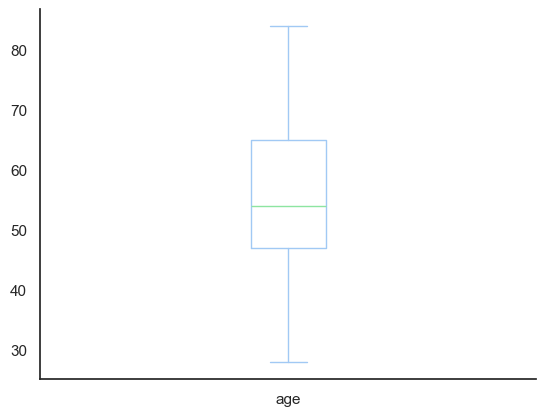

In [81]:
df["age"].plot(kind="box")

<Axes: >

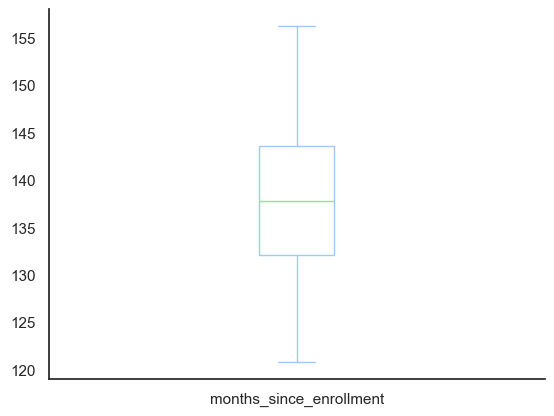

In [82]:
df["months_since_enrollment"].plot(kind="box")

In [83]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,age,num_children,spouse,num_household,income_per_household,total_purchases,mnt_month_avg_purchases,mnt_month_avg_wines,mnt_month_avg_fruits,mnt_month_avg_meat_products,mnt_month_avg_fish_products,mnt_month_avg_sweet_products,mnt_month_avg_gold_prods,monthly_income,months_since_enrollment,age_group,num_accepted_campaigns,preferred_channel,deals_purchases_ratio
0,5524,1957,graduation,single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,0,0,1,58138.0,1617,67.375000,26.458333,3.666667,22.750000,7.166667,3.666667,3.666667,4844.833333,153.166667,60+,1,catalog,0.001855
1,2174,1954,graduation,single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,2,0,3,15448.0,27,1.125000,0.458333,0.041667,0.250000,0.083333,0.041667,0.250000,3862.000000,124.966667,60+,0,store,0.074074
2,4141,1965,graduation,together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,0,0,1,71613.0,776,32.333333,17.750000,2.041667,5.291667,4.625000,0.875000,1.750000,5967.750000,136.533333,50-60,0,store,0.001289
3,6182,1984,graduation,together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,1,0,2,13323.0,53,2.208333,0.458333,0.166667,0.833333,0.416667,0.125000,0.208333,2220.500000,122.966667,30-40,0,store,0.037736
4,5324,1981,phd,married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,1,1,3,19431.0,422,17.583333,7.208333,1.791667,4.916667,1.916667,1.125000,0.625000,4857.750000,131.500000,40-50,0,store,0.011848


## Income Analysis

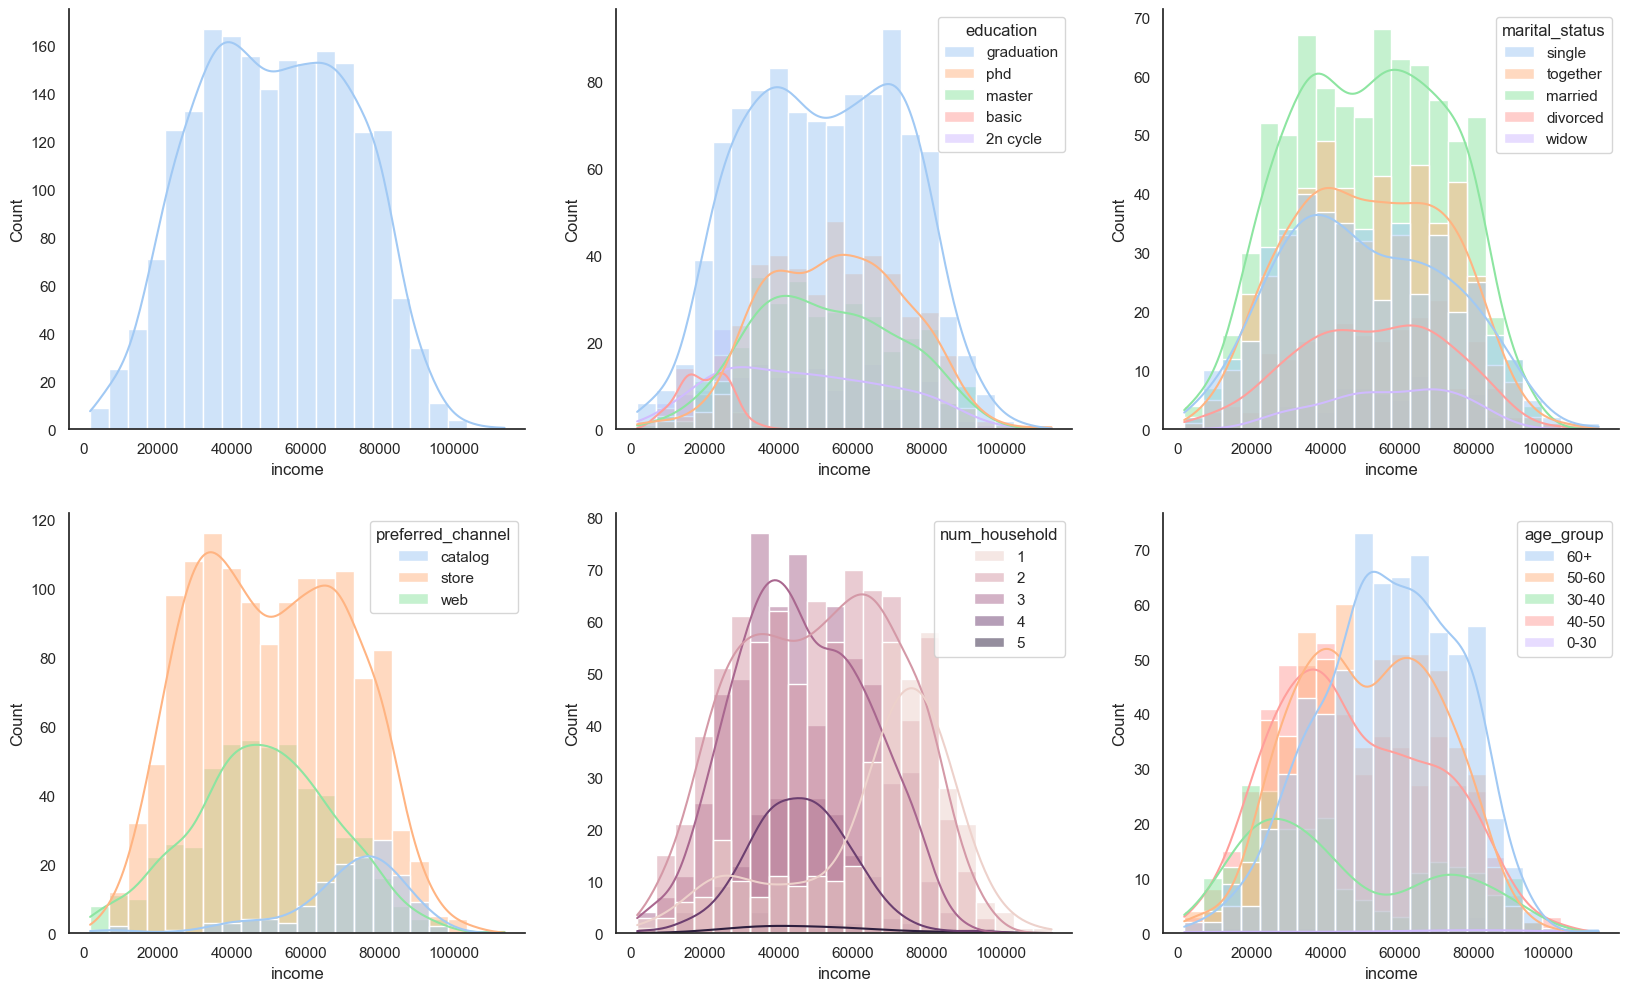

In [84]:
# PLot the income with some categorical variables
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

columns = [None, "education", "marital_status", "preferred_channel", "num_household", "age_group"]
for ax, col in zip(axes, columns):
    sns.histplot(data=df, x='income', hue=col, kde=True, ax=ax)
plt.show()

## Correlation Analysis

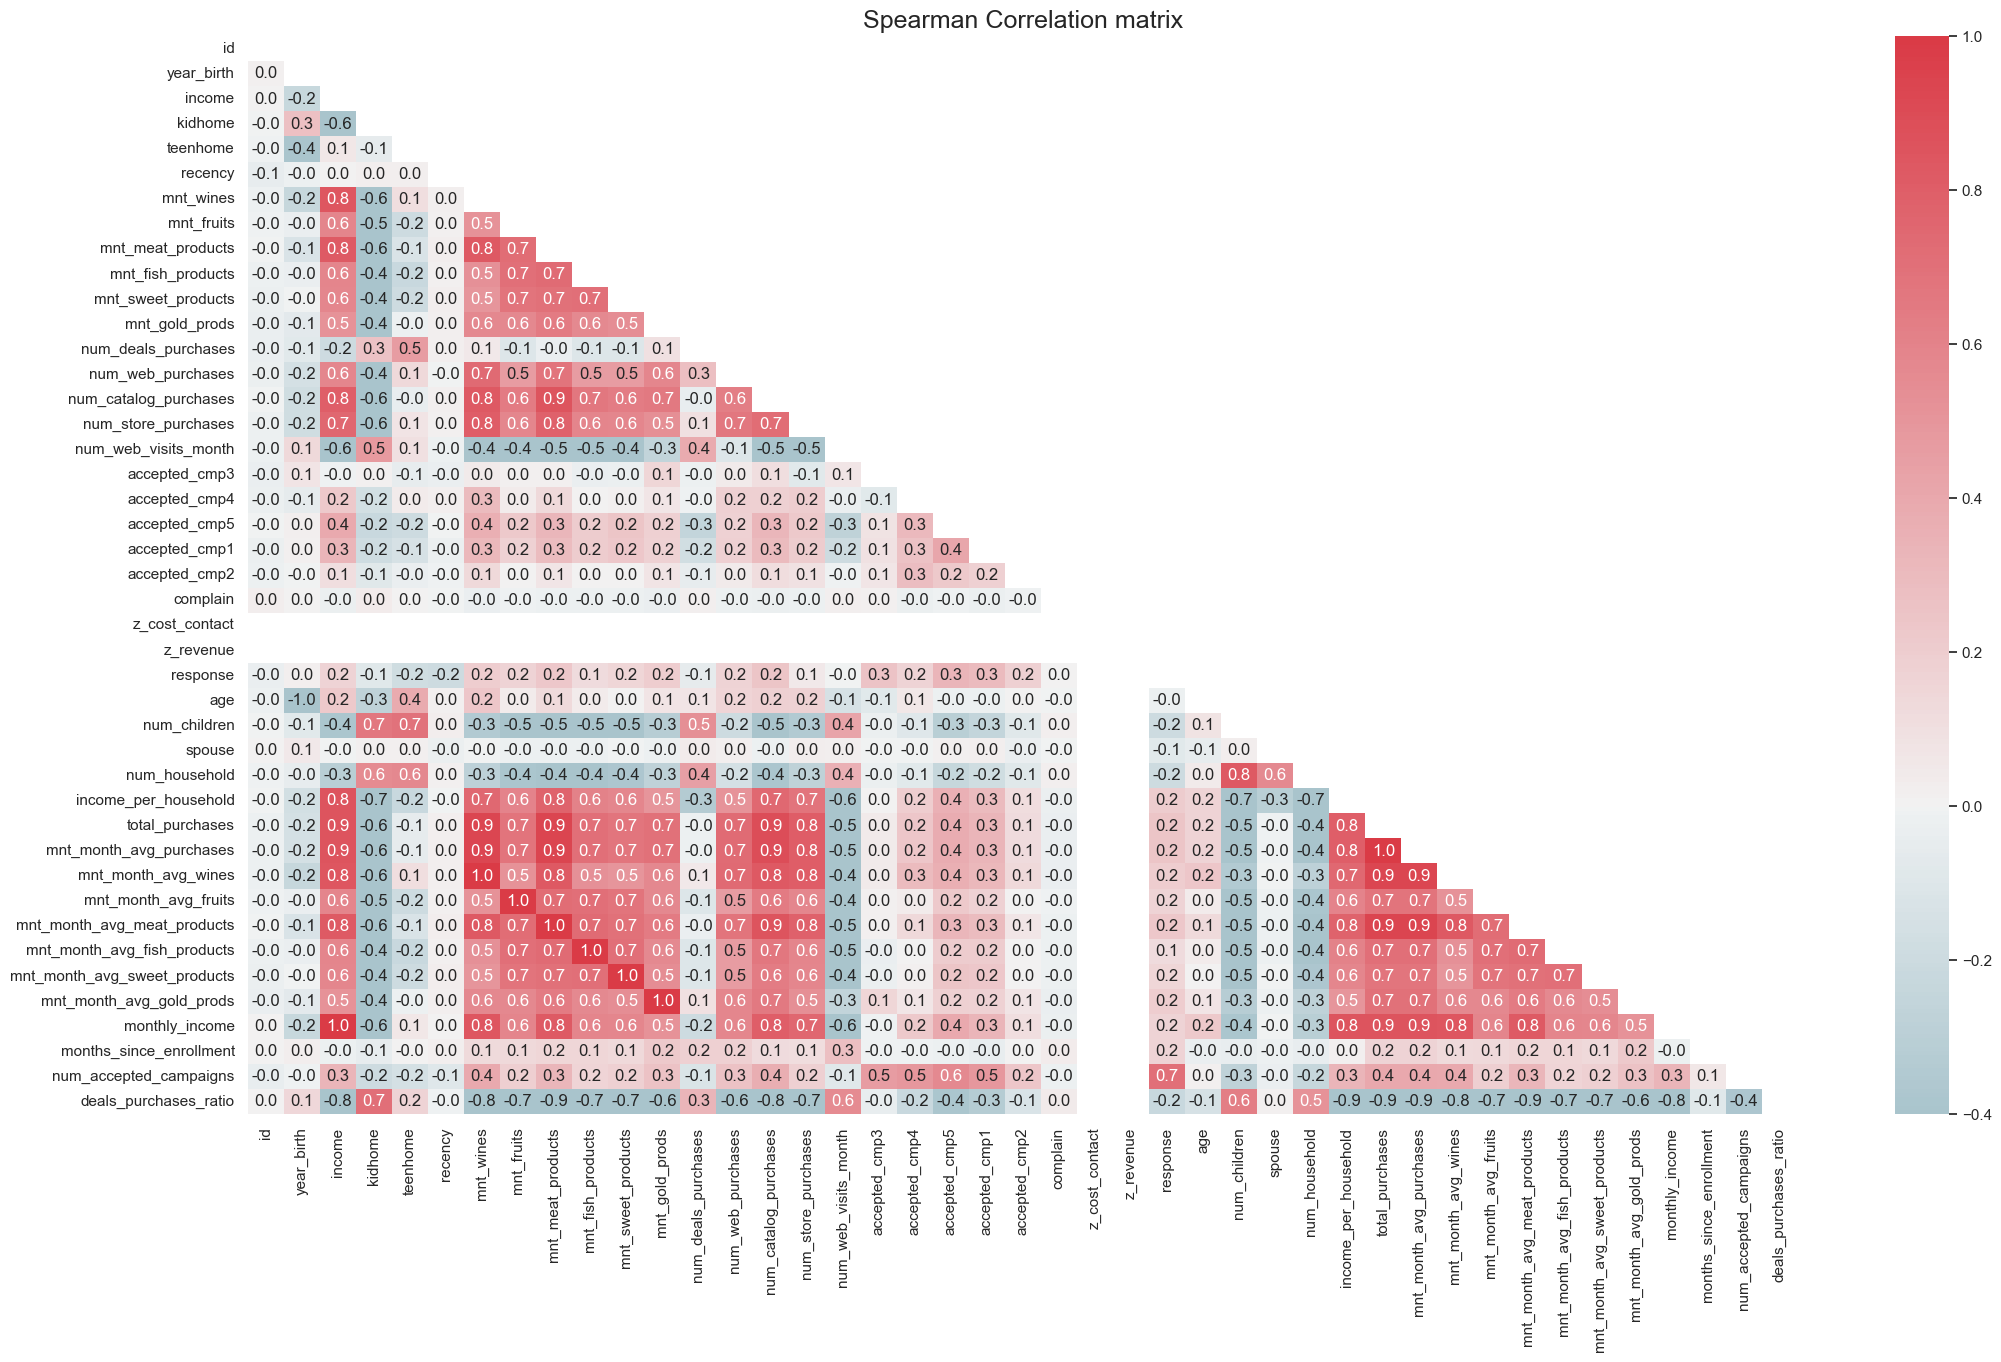

In [85]:
numerical_features = df.select_dtypes(include="number").columns.to_list()


cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr_df = df[numerical_features].corr(method="spearman")
mask = np.triu(corr_df)
plt.figure(figsize=(25, 14))
plt.title('Spearman Correlation matrix', fontsize=18)
sns.heatmap(corr_df, annot=True, fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=mask)

plt.show()

# Modeling

In [ ]:
feature_columns = [
    "education",
    "marital_status",
    "age_group",
    "preferred_channel",
    "monthly_income",
    "mnt_month_avg_wines",
    "mnt_month_avg_fruits",
    "mnt_month_avg_meat_products",
    "mnt_month_avg_fish_products",
    "mnt_month_avg_sweet_products",
    "mnt_month_avg_gold_prods",
    "mnt_month_avg_purchases",
    "num_deals_purchases",
    "num_web_visits_month",
    "num_accepted_campaigns",
    "num_children",
    "spouse",
    "num_household",
    "income_per_household",
    "months_since_enrollment",
    "deals_purchases_ratio",
]

X = df[["id"] + feature_columns]

categorical_features = X.select_dtypes(include="object").columns.to_list()

numerical_features = X.drop(columns=["id"]).select_dtypes(include="number").columns.to_list()

## Optimum Clusters Using Elbow Method

In [98]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,age,num_children,spouse,num_household,income_per_household,total_purchases,mnt_month_avg_purchases,mnt_month_avg_wines,mnt_month_avg_fruits,mnt_month_avg_meat_products,mnt_month_avg_fish_products,mnt_month_avg_sweet_products,mnt_month_avg_gold_prods,monthly_income,months_since_enrollment,age_group,num_accepted_campaigns,preferred_channel,deals_purchases_ratio,cluster
0,5524,1957,graduation,single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,0,0,1,58138.0,1617,67.375000,26.458333,3.666667,22.750000,7.166667,3.666667,3.666667,4844.833333,153.166667,60+,1,catalog,0.001855,1
1,2174,1954,graduation,single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,2,0,3,15448.0,27,1.125000,0.458333,0.041667,0.250000,0.083333,0.041667,0.250000,3862.000000,124.966667,60+,0,store,0.074074,2
2,4141,1965,graduation,together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,0,0,1,71613.0,776,32.333333,17.750000,2.041667,5.291667,4.625000,0.875000,1.750000,5967.750000,136.533333,50-60,0,store,0.001289,1
3,6182,1984,graduation,together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,1,0,2,13323.0,53,2.208333,0.458333,0.166667,0.833333,0.416667,0.125000,0.208333,2220.500000,122.966667,30-40,0,store,0.037736,2
4,5324,1981,phd,married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,1,1,3,19431.0,422,17.583333,7.208333,1.791667,4.916667,1.916667,1.125000,0.625000,4857.750000,131.500000,40-50,0,store,0.011848,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2253,1990,graduation,married,18929.0,0,0,2013-02-16,15,32,0,8,23,4,18,1,1,0,4,6,0,0,0,0,0,0,3,11,0,34,0,1,2,9464.5,85,3.541667,1.333333,0.000000,0.333333,0.958333,0.166667,0.750000,1577.416667,142.733333,30-40,0,store,0.011765,2
2014,3428,1991,phd,together,68682.0,0,0,2013-06-10,56,919,0,505,99,30,45,1,4,9,10,2,0,0,0,0,0,0,3,11,0,33,0,0,1,68682.0,1598,66.583333,38.291667,0.000000,21.041667,4.125000,1.250000,1.875000,5723.500000,138.933333,30-40,0,store,0.000626,1
2015,3386,1992,graduation,married,34935.0,0,0,2013-06-21,71,34,4,66,3,10,20,1,2,1,4,7,0,0,0,0,0,0,3,11,0,32,0,1,2,17467.5,137,5.708333,1.416667,0.166667,2.750000,0.125000,0.416667,0.833333,2911.250000,138.566667,30-40,0,store,0.007299,2
2016,2669,1993,graduation,single,74293.0,0,0,2014-04-05,66,375,152,335,93,91,81,1,5,4,6,2,0,0,0,0,0,0,3,11,0,31,0,0,1,74293.0,1127,46.958333,15.625000,6.333333,13.958333,3.875000,3.791667,3.375000,6191.083333,128.966667,30-40,0,store,0.000887,1


In [119]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5)),
])

X_preprocessed = pipeline.fit_transform(X.drop(columns=["id"]))

inertias = []

num_clusters = np.arange(2, 10)
for num_cluster in num_clusters:
    model = KMeans(n_clusters=num_cluster)
    model.fit(X_preprocessed)
    inertias.append(model.inertia_)

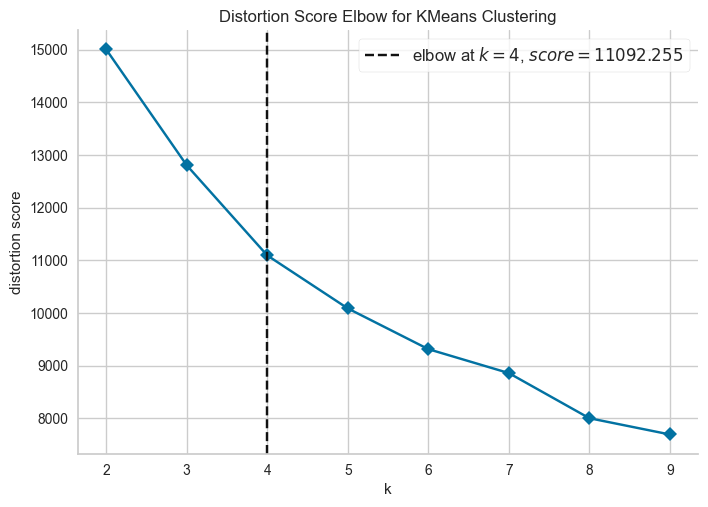

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10), timings=False)

visualizer.fit(X_preprocessed)
visualizer.show()

Based on the Elbow Method, the optimal number of clusters is 4, so we gonna follow with this number.

In [121]:
# create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5)),
    ('kmeans', KMeans(n_clusters=4))
])

pipeline.fit(X.drop(columns=["id"]))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_income',
                                                   'mnt_month_avg_wines',
                                                   'mnt_month_avg_fruits',
                                                   'mnt_month_avg_meat_products',
                                                   'mnt_month_avg_fish_products',
                                                   'mnt_month_avg_sweet_products',
                                                   'mnt_month_avg_gold_prods',
                                                   'mnt_month_avg_purchases',
                                                   'num_deals_purchases',
                                                   'num...month',
                                                   'num_accepted_campaigns',
                                                   'num_children', 'spouse',
                                                   'num_household',
                                                   'income_per_household',
                                                   'months_since_enrollment',
                                                   'deals_purchases_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education',
                                                   'marital_status',
                                                   'age_group',
                                                   'preferred_channel'])])),
                ('pca', PCA(n_components=5)),
                ('kmeans', KMeans(n_clusters=4))])

In [122]:
df["cluster"] = pipeline.predict(X.drop(columns=["id"]))

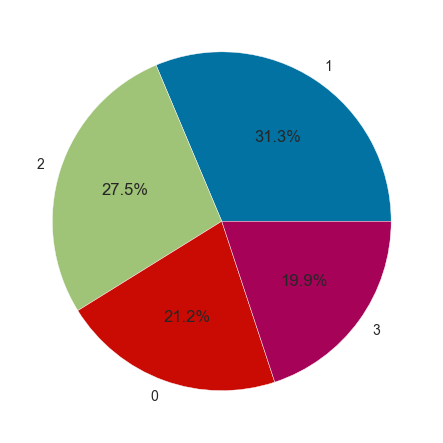

In [123]:
dist = df["cluster"] .value_counts(normalize=True)
# plot pie chart

plt.pie(dist, labels=dist.index, autopct='%1.1f%%');